<a href="https://colab.research.google.com/github/Carousel303/Dementia-Analysis/blob/main/Dementia_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The aim was to conduct a data analysis project with medical data in a more structured and typical form. Data was wrangled and merged into normal form and after exploratory data analysis and visualization, two hypothesis regarding education and socio-economic status were formed and tested with ANOVA and T-tests before drawing conclusions and giving options for further analysis.

#Notes on steps of analysis

keep data queries scaleable and repeatable
check
- merge into normal form
- null values
- dtypes
- duplicates
- outliers
(This order worked best)

Univariate Analysis
 - histograms (e.g. What do individual values look like? What are the high and low values? What would be considered the average?)

Bivariate Analysis
- scatter plots (e.g. variables for different groups)
- overlapped histograms with two variables
- correlation index

Multivariate Analysis
- scatter plots with split variable (e.g. variable x for demented, non-demented, converted groups)
- boxplots for different categorical variables (SES for for demented, non-demented, converted groups)



#About Dataset (Kaggle)

https://www.kaggle.com/datasets/shashwatwork/dementia-prediction-dataset

Context
Dementia is a syndrome – usually of a chronic or progressive nature – in which there is deterioration in cognitive function (i.e. the ability to process thought) beyond what might be expected from normal aging. It affects memory, thinking, orientation, comprehension, calculation, learning capacity, language, and judgment. Consciousness is not affected. The impairment in cognitive function is commonly accompanied and occasionally preceded, by deterioration in emotional control, social behaviou, or motivation.

Dementia results from a variety of diseases and injuries that primarily or secondarily affect the brain, such as Alzheimer's disease or stroke.

Dementia is one of the major causes of disability and dependency among older people worldwide. It can be overwhelming, not only for the people who have it, but also for their carers and families. There is often a lack of awareness and understanding of dementia, resulting in stigmatization and barriers to diagnosis and care. The impact of dementia on carers, family, and society at large can be physical, psychological, social and e and economic

Content
This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit

# Identification of variables
(Text from study. See desktop)

https://www.sciencedirect.com/science/article/pii/S2352914819300917?via%3Dihub

The sample training data (Table 1) included with demographic values of Subject ID, MRI ID, Group, Visit, MR delay, Sex, Age, Social Economic Status (SES), Education level (EDUC), MMSE [22], Clinical Dementia Ratio (CDR) [23], estimated Total Intracranial Volume (e-TIV), normalized Whole Brain Volume (n-WBV) and Atlas Scaling Factor (ASF). Also, Fig. 3. Explaining the present MRI sessions categorization based on the current CDR (0–2) score and total sessions of non-demented (190), demented (146) and converted (37) were evaluated. In particular, some subjects treated as demented at initial visit later transformed into the non-demented managed by converted type. If CDR value is equal to zero, the subjects were considered as mostly non-demented, simultaneously if CDR≥1 the subjects will face the tendency to have dementia.

# MMSE variable

The MMSE is designed to quickly evaluate an individual's cognitive functioning, including aspects of orientation, memory, attention, language, and visuospatial abilities.

The MMSE is scored out of 30 points, with a higher score indicating better cognitive function. The scores are often categorized as follows:

- 24-30: No cognitive impairment
- 18-23: Mild cognitive impairment
- 0-17: Severe cognitive impairment

# Merging Data
The Kaggle csv file does not have primary keys. The Subject ID is repeated the same number of times as the visits or scans they received. In order to have the data in 1st normal form it was necessary to make the Subject ID the primary key and then subsequent MRI scans and their corresponding data followed.
This proved to be challenging and was eventually completed in Excel where individual sheets were created according to visit (note there is a potential for 5 visits not 4 as stated by Kaggle). The missing data was then calculated (see below) and finally merged here in Colab using a left join. Result was 150 rows with 54 columns. This resulted in more NaN values but data was in normal form.

# Missing Values
Only Demented group was missing data. Data filtered for this group and missing values calculated and added in Excel. Total missing values for SES (8 patients) and MMSE (Visits 2 (61) & 3 (15)). Average SES is 2.75 (rounded up to 3 as data is integer. MMSE Visit 2, 24.249 and Visit 3, 24.4, both rounded down to integer. (Calculations deleted to avoid unwanted columns in data merge)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

Import Data

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving dementia_dataset.xlsx to dementia_dataset (1).xlsx


In [ ]:
df = pd.read_excel('dementia_dataset.xlsx')

In [ ]:
# Read the Excel file
file_path = 'dementia_dataset.xlsx'
xls = pd.ExcelFile(file_path)

# Initialize an empty list to store the DataFrames for each sheet
dfs = []

# Define the sheet names to be joined (Visit 1, Visit 2, Visit 3, Visit 4, Visit 5)
sheet_names = ['Visit 1', 'Visit 2', 'Visit 3', 'Visit 4', 'Visit 5']

# Read and append the selected sheets into separate DataFrames
for sheet_name in sheet_names:
    df = pd.read_excel(xls, sheet_name)
    dfs.append(df)

# Perform the left join on 'Subject ID'
joined_df = dfs[0]  # Start with the first DataFrame as the base
for df in dfs[1:]:  # Left join the remaining DataFrames
    joined_df = pd.merge(joined_df, df, on='Subject ID', how='left')

# Print the joined DataFrame
print(joined_df.columns)


Index(['Subject ID', 'MRI ID ', 'Group', 'Visit 1', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'MRI ID 2',
       'Group 2', 'Visit 2', 'MR Delay 2', 'Age 2', 'MMSE 2', 'CDR 2',
       'eTIV 2', 'nWBV 2', 'ASF 2', 'MRI ID 3', 'Group 3', 'Visit 3',
       'MR Delay 3', 'Age 3', 'MMSE 3', 'CDR 3', 'eTIV 3', 'nWBV 3', 'ASF 3',
       'MRI ID 4', 'Group 4', 'Visit 4', 'MR Delay 4 ', 'Age 4', 'MMSE 4',
       'CDR 4', 'eTIV 4', 'nWBV 4', 'ASF 4', 'MRI ID 5', 'Group 5', 'Visit 5',
       'MR Delay 5', 'Age 5', 'MMSE 5', 'CDR 5', 'eTIV 5', 'nWBV 5', 'ASF 5'],
      dtype='object')


In [ ]:
joined_df

,Subject ID,MRI ID,Group,Visit 1,MR Delay,M/F,Hand,Age,EDUC,SES,...,MRI ID 5,Group 5,Visit 5,MR Delay 5,Age 5,MMSE 5,CDR 5,eTIV 5,nWBV 5,ASF 5
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,OAS2_0182,OAS2_0182_MR1,Demented,1,0,M,R,73,12,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,F,R,66,13,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Check Data Types

In [ ]:
print(joined_df.dtypes)

Subject ID      object
MRI ID          object
Group           object
Visit 1          int64
MR Delay         int64
M/F             object
Hand            object
Age              int64
EDUC             int64
SES              int64
MMSE             int64
CDR            float64
eTIV             int64
nWBV           float64
ASF            float64
MRI ID 2        object
Group 2         object
Visit 2        float64
MR Delay 2     float64
Age 2          float64
MMSE 2         float64
CDR 2          float64
eTIV 2         float64
nWBV 2         float64
ASF 2          float64
MRI ID 3        object
Group 3         object
Visit 3        float64
MR Delay 3     float64
Age 3          float64
MMSE 3         float64
CDR 3          float64
eTIV 3         float64
nWBV 3         float64
ASF 3          float64
MRI ID 4        object
Group 4         object
Visit 4        float64
MR Delay 4     float64
Age 4          float64
MMSE 4         float64
CDR 4          float64
eTIV 4         float64
nWBV 4     

SES and MMSE should be integers

In [ ]:
# List of column names to change data type
columns_to_convert = ['MMSE 2', 'MMSE 3', 'MMSE 4', 'MMSE 5']

# Fill missing values with 0 (change to a different value if desired)
joined_df[columns_to_convert] = joined_df[columns_to_convert].fillna(0)

# Convert columns' data type from float to integer
joined_df[columns_to_convert] = joined_df[columns_to_convert].astype(int)



In [ ]:
print(joined_df.dtypes)

Subject ID      object
MRI ID          object
Group           object
Visit 1          int64
MR Delay         int64
M/F             object
Hand            object
Age              int64
EDUC             int64
SES              int64
MMSE             int64
CDR            float64
eTIV             int64
nWBV           float64
ASF            float64
MRI ID 2        object
Group 2         object
Visit 2        float64
MR Delay 2     float64
Age 2          float64
MMSE 2           int64
CDR 2          float64
eTIV 2         float64
nWBV 2         float64
ASF 2          float64
MRI ID 3        object
Group 3         object
Visit 3        float64
MR Delay 3     float64
Age 3          float64
MMSE 3           int64
CDR 3          float64
eTIV 3         float64
nWBV 3         float64
ASF 3          float64
MRI ID 4        object
Group 4         object
Visit 4        float64
MR Delay 4     float64
Age 4          float64
MMSE 4           int64
CDR 4          float64
eTIV 4         float64
nWBV 4     

Data types are now appropriate

# Check Duplicate Values

In [ ]:
duplicates = joined_df[joined_df.duplicated(subset='Subject ID', keep=False)]
duplicates

,Subject ID,MRI ID,Group,Visit 1,MR Delay,M/F,Hand,Age,EDUC,SES,...,MRI ID 5,Group 5,Visit 5,MR Delay 5,Age 5,MMSE 5,CDR 5,eTIV 5,nWBV 5,ASF 5


0 rows now indicates no duplicates. I also want to check the mri/visit count matches with the Excel file.
Excel -
- 1st MRI = 150
- 2nd     = 144
- 3rd     = 58
- 4th     = 15
- 5th     = 6

In [ ]:
visits = ['Visit 1', 'Visit 2', 'Visit 3', 'Visit 4', 'Visit 5']

for visit in visits:
    visit_count = joined_df[visit].count()
    print(f"The number of visits for {visit} is {visit_count}")

The number of visits for Visit 1 is 150
The number of visits for Visit 2 is 144
The number of visits for Visit 3 is 58
The number of visits for Visit 4 is 15
The number of visits for Visit 5 is 6


Looks Good!

# Exploratory Analysis and Examination of Outliers


In [ ]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Now, when you print the DataFrame, it will display all rows and columns



In [ ]:
# Filter the DataFrame to rows where any of the specified columns have the value 'Demented'
demented = joined_df[
    (joined_df['Group'] == 'Demented') |
    (joined_df['Group 2'] == 'Demented') |
    (joined_df['Group 3'] == 'Demented') |
    (joined_df['Group 4'] == 'Demented') |
    (joined_df['Group 5'] == 'Demented')
]

# Display the summary statistics for the selected rows
print(demented.describe(include='all'))


       Subject ID        MRI ID      Group  Visit 1  MR Delay  M/F Hand  \
count          64             64        64     64.0      64.0   64   64   
unique         64             64         1      NaN       NaN    2    1   
top     OAS2_0002  OAS2_0002_MR1  Demented      NaN       NaN    M    R   
freq            1              1        64      NaN       NaN   36   64   
mean          NaN            NaN       NaN      1.0       0.0  NaN  NaN   
std           NaN            NaN       NaN      0.0       0.0  NaN  NaN   
min           NaN            NaN       NaN      1.0       0.0  NaN  NaN   
25%           NaN            NaN       NaN      1.0       0.0  NaN  NaN   
50%           NaN            NaN       NaN      1.0       0.0  NaN  NaN   
75%           NaN            NaN       NaN      1.0       0.0  NaN  NaN   
max           NaN            NaN       NaN      1.0       0.0  NaN  NaN   

              Age       EDUC        SES       MMSE        CDR         eTIV  \
count   64.000000  64

Demented observations

Potential outliers(Look at mean, std, max)
- max etiv
- MMSE 3
- MMSE 4
- MMSE 5

In [ ]:
nondemented = joined_df[
    (joined_df['Group'] == 'Nondemented') |
    (joined_df['Group 2'] == 'Nondemented') |
    (joined_df['Group 3'] == 'Nondemented') |
    (joined_df['Group 4'] == 'Nondemented') |
    (joined_df['Group 5'] == 'Nondemented')
]

# Display the summary statistics for the selected rows
print(nondemented.describe(include='all'))

       Subject ID        MRI ID         Group  Visit 1  MR Delay  M/F Hand  \
count          72             72           72     72.0      72.0   72   72   
unique         72             72            1      NaN       NaN    2    1   
top     OAS2_0001  OAS2_0001_MR1  Nondemented      NaN       NaN    F    R   
freq            1              1           72      NaN       NaN   50   72   
mean          NaN            NaN          NaN      1.0       0.0  NaN  NaN   
std           NaN            NaN          NaN      0.0       0.0  NaN  NaN   
min           NaN            NaN          NaN      1.0       0.0  NaN  NaN   
25%           NaN            NaN          NaN      1.0       0.0  NaN  NaN   
50%           NaN            NaN          NaN      1.0       0.0  NaN  NaN   
75%           NaN            NaN          NaN      1.0       0.0  NaN  NaN   
max           NaN            NaN          NaN      1.0       0.0  NaN  NaN   

              Age       EDUC        SES       MMSE   CDR       

Nondemented Observations

Potential outliers
- etiv 1 & 2
- nwbv 1 2 3
- MMSE 4 & 5


Also note differences between mean SES and education of demented and nondemented

In [ ]:
converted = joined_df[
    (joined_df['Group'] == 'Converted') |
    (joined_df['Group 2'] == 'Converted') |
    (joined_df['Group 3'] == 'Converted') |
    (joined_df['Group 4'] == 'Converted') |
    (joined_df['Group 5'] == 'Converted')
]

# Display the summary statistics for the selected rows
print(converted.describe(include='all'))

       Subject ID        MRI ID       Group  Visit 1  MR Delay  M/F Hand  \
count          14             14         14     14.0      14.0   14   14   
unique         14             14          1      NaN       NaN    2    1   
top     OAS2_0018  OAS2_0018_MR1  Converted      NaN       NaN    F    R   
freq            1              1         14      NaN       NaN   10   14   
mean          NaN            NaN        NaN      1.0       0.0  NaN  NaN   
std           NaN            NaN        NaN      0.0       0.0  NaN  NaN   
min           NaN            NaN        NaN      1.0       0.0  NaN  NaN   
25%           NaN            NaN        NaN      1.0       0.0  NaN  NaN   
50%           NaN            NaN        NaN      1.0       0.0  NaN  NaN   
75%           NaN            NaN        NaN      1.0       0.0  NaN  NaN   
max           NaN            NaN        NaN      1.0       0.0  NaN  NaN   

              Age       EDUC        SES       MMSE        CDR         eTIV  \
count   1

Converted Observations

Potential Outliers
- CDR
- MR delay 2
- MMSE 4 & 5


Also, identify converted and determine at what age does conversion take place? (Impossible to know because Group is determined as converted and doesn't account for the change).

Consistent increases in CDR and eTIV and consistent decreases in nWBV between visits for converted patients. What are these values/terms? Are these changes significant?


*Outliers not removed at this stage of analysis

Histograms for age

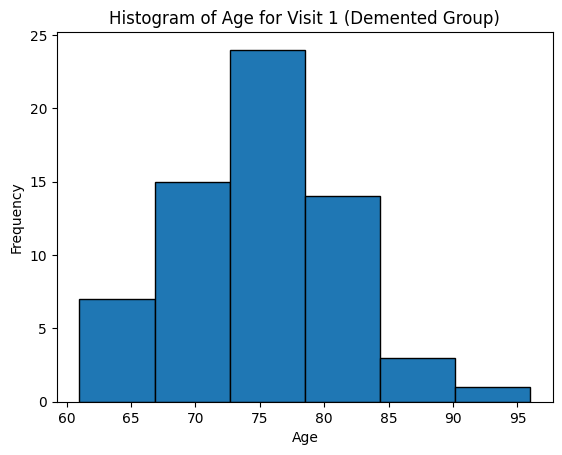

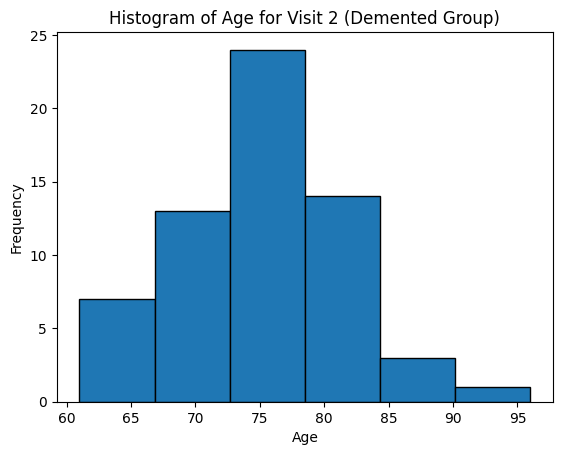

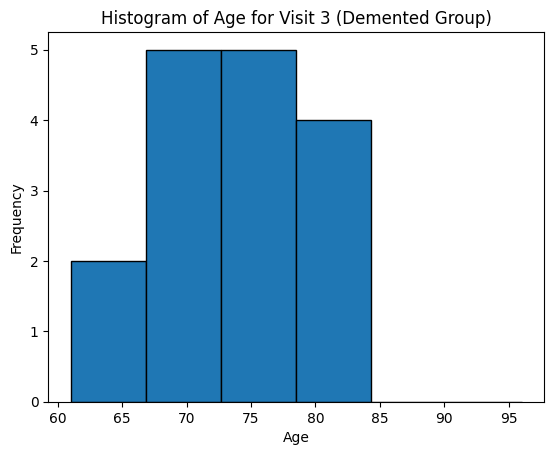

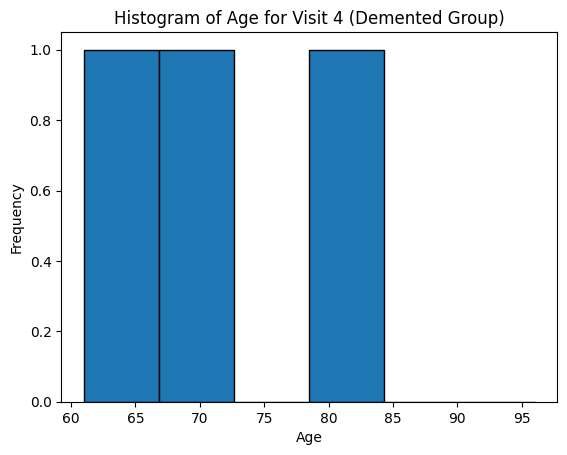

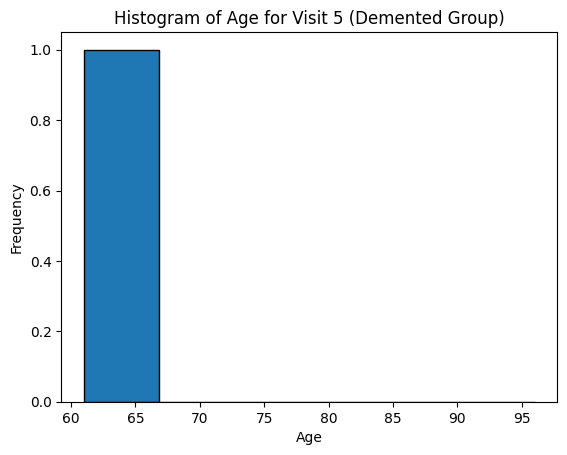

In [ ]:
# Filter the DataFrame to rows where 'Group' is 'Demented'
demented_df = joined_df[joined_df['Group'] == 'Demented']

# List of 'Visit' columns
visit_columns = ['Visit 1', 'Visit 2', 'Visit 3', 'Visit 4', 'Visit 5']

# Calculate overall minimum and maximum age values
min_age = demented_df['Age'].min()
max_age = demented_df['Age'].max()

# Set the number of bins for all histograms
num_bins = 6

# Create a histogram for each 'Visit' column with its corresponding 'Age' data
for visit_col in visit_columns:
    # Filter the DataFrame for the specific visit
    visit_df = demented_df[demented_df[visit_col].notna()]

    # Get the 'Age' data for the current visit
    age_data = visit_df['Age']

    # Create the histogram with the same bins for all
    plt.figure()  # Create a new figure for each histogram
    plt.hist(age_data, bins=num_bins, range=(min_age, max_age), edgecolor='black')

    # Set the title and axis labels
    plt.title(f'Histogram of Age for {visit_col} (Demented Group)')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

plt.show()




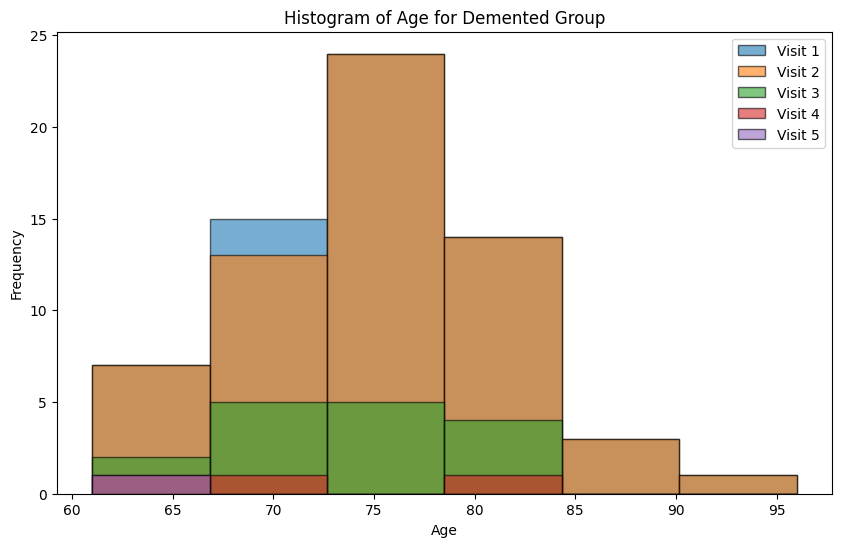

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to rows where 'Group' is 'Demented'
demented_df = joined_df[joined_df['Group'] == 'Demented']

# List of 'Visit' columns
visit_columns = ['Visit 1', 'Visit 2', 'Visit 3', 'Visit 4', 'Visit 5']

# Calculate overall minimum and maximum age values
min_age = demented_df['Age'].min()
max_age = demented_df['Age'].max()

# Set the number of bins for all histograms
num_bins = 6

# Create the figure and axes
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot each histogram on the same axes
for visit_col in visit_columns:
    # Filter the DataFrame for the specific visit
    visit_df = demented_df[demented_df[visit_col].notna()]

    # Get the 'Age' data for the current visit
    age_data = visit_df['Age']

    # Create the histogram with the same bins for all and add transparency
    ax.hist(age_data, bins=num_bins, range=(min_age, max_age), edgecolor='black', alpha=0.6, label=visit_col)

# Set the title and axis labels
plt.title('Histogram of Age for Demented Group')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add legend to distinguish the histograms for different visits
plt.legend()

plt.show()


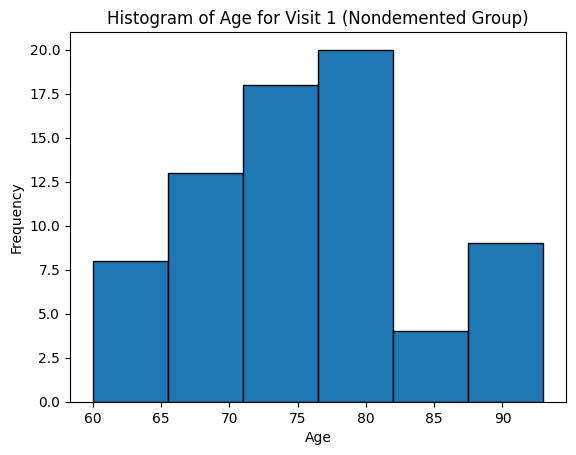

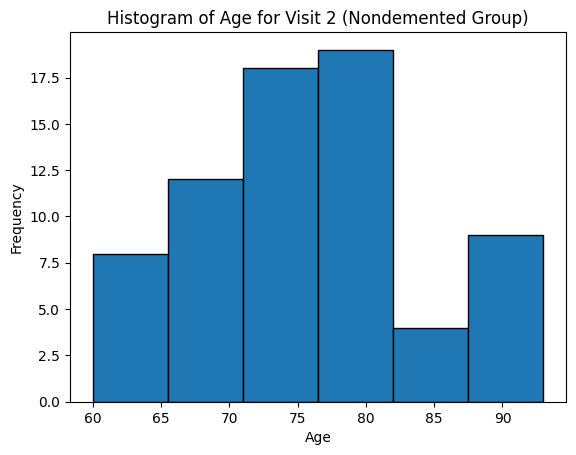

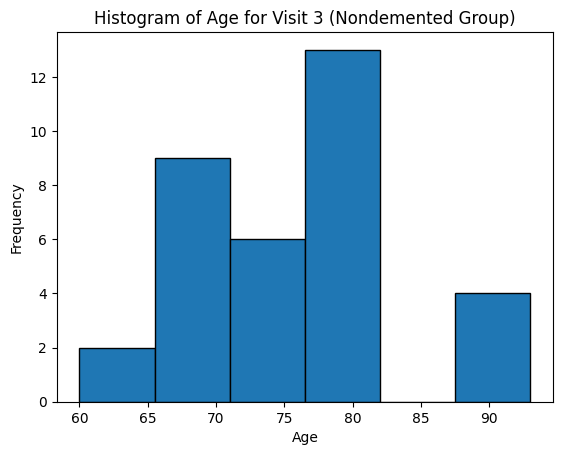

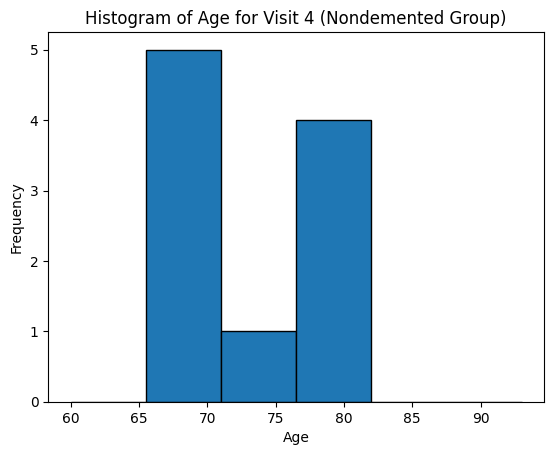

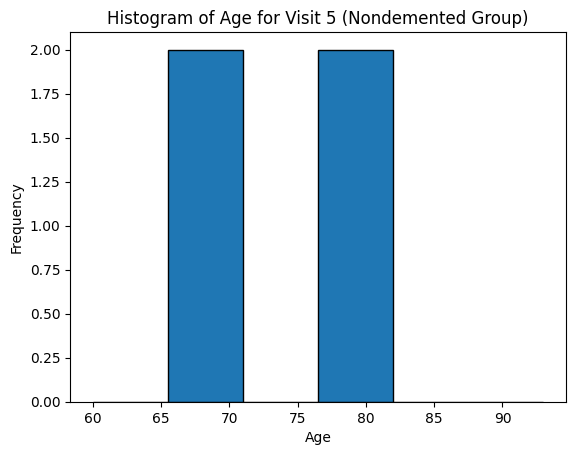

In [ ]:
# Filter the DataFrame to rows where 'Group' is 'Nondemented'
nondemented_df = joined_df[joined_df['Group'] == 'Nondemented']

# List of 'Visit' columns
visit_columns = ['Visit 1', 'Visit 2', 'Visit 3', 'Visit 4', 'Visit 5']

# Calculate overall minimum and maximum age values
min_age = nondemented_df['Age'].min()
max_age = nondemented_df['Age'].max()

# Set the number of bins for all histograms
num_bins = 6

# Create a histogram for each 'Visit' column with its corresponding 'Age' data
for visit_col in visit_columns:
    # Filter the DataFrame for the specific visit
    visit_df = nondemented_df[nondemented_df[visit_col].notna()]

    # Get the 'Age' data for the current visit
    age_data = visit_df['Age']

    # Create the histogram with the same bins for all
    plt.figure()  # Create a new figure for each histogram
    plt.hist(age_data, bins=num_bins, range=(min_age, max_age), edgecolor='black')

    # Set the title and axis labels
    plt.title(f'Histogram of Age for {visit_col} (Nondemented Group)')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

plt.show()


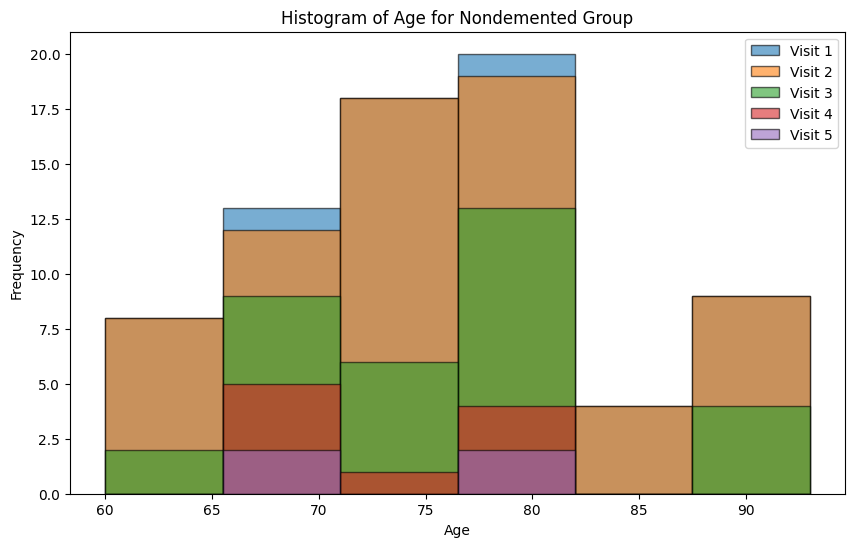

In [ ]:
# Filter the DataFrame to rows where 'Group' is 'Nondemented'
nondemented_df = joined_df[joined_df['Group'] == 'Nondemented']

# List of 'Visit' columns
visit_columns = ['Visit 1', 'Visit 2', 'Visit 3', 'Visit 4', 'Visit 5']

# Calculate overall minimum and maximum age values
min_age = nondemented_df['Age'].min()
max_age = nondemented_df['Age'].max()

# Set the number of bins for all histograms
num_bins = 6

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot each histogram on the same axes
for visit_col in visit_columns:
    # Filter the DataFrame for the specific visit
    visit_df = nondemented_df[nondemented_df[visit_col].notna()]

    # Get the 'Age' data for the current visit
    age_data = visit_df['Age']

    # Create the histogram with the same bins for all and add transparency
    plt.hist(age_data, bins=num_bins, range=(min_age, max_age), edgecolor='black', alpha=0.6, label=visit_col)

# Set the title and axis labels
plt.title('Histogram of Age for Nondemented Group')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add legend to distinguish the histograms for different visits
plt.legend()

plt.show()


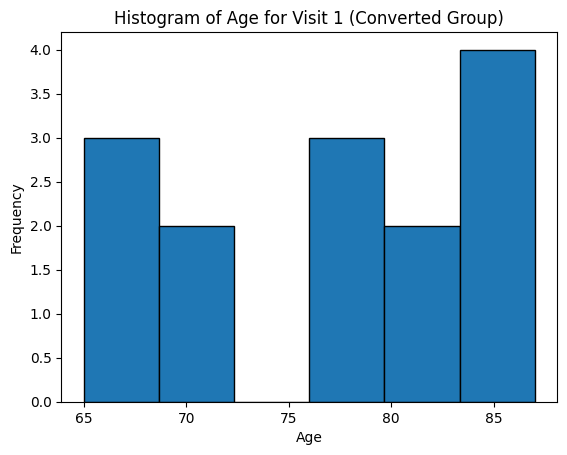

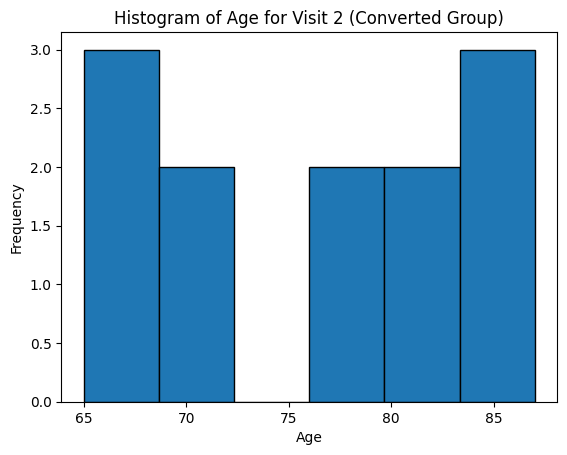

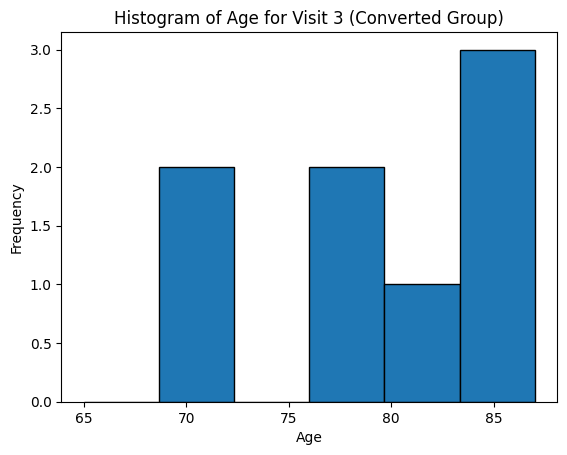

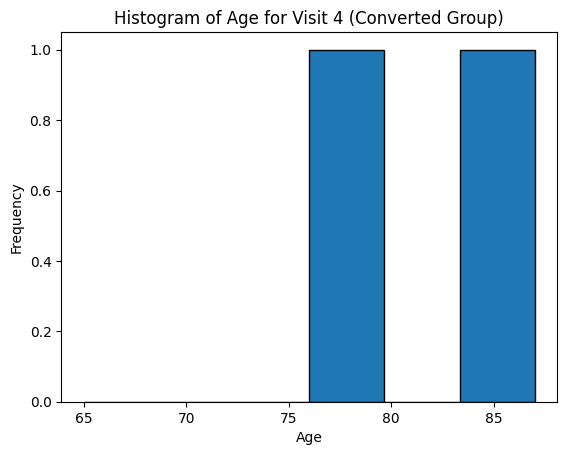

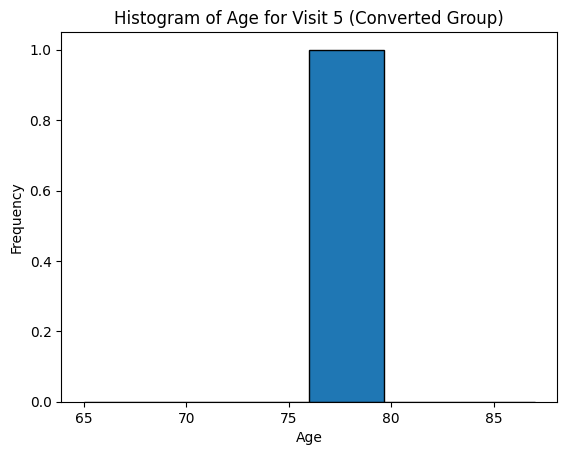

In [ ]:
# Filter the DataFrame to rows where 'Group' is 'Converted'
converted_df = joined_df[joined_df['Group'] == 'Converted']

# List of 'Visit' columns
visit_columns = ['Visit 1', 'Visit 2', 'Visit 3', 'Visit 4', 'Visit 5']

# Calculate overall minimum and maximum age values
min_age = converted_df['Age'].min()
max_age = converted_df['Age'].max()

# Set the number of bins for all histograms
num_bins = 6

# Create a histogram for each 'Visit' column with its corresponding 'Age' data
for visit_col in visit_columns:
    # Filter the DataFrame for the specific visit
    visit_df = converted_df[converted_df[visit_col].notna()]

    # Get the 'Age' data for the current visit
    age_data = visit_df['Age']

    # Create the histogram with the same bins for all
    plt.figure()  # Create a new figure for each histogram
    plt.hist(age_data, bins=num_bins, range=(min_age, max_age), edgecolor='black')

    # Set the title and axis labels
    plt.title(f'Histogram of Age for {visit_col} (Converted Group)')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

plt.show()


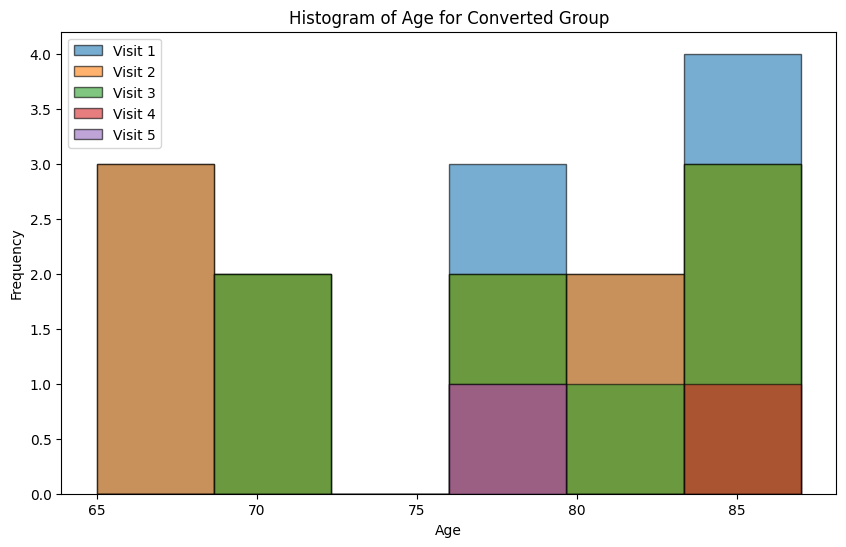

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to rows where 'Group' is 'Converted'
converted_df = joined_df[joined_df['Group'] == 'Converted']

# List of 'Visit' columns
visit_columns = ['Visit 1', 'Visit 2', 'Visit 3', 'Visit 4', 'Visit 5']

# Calculate overall minimum and maximum age values
min_age = converted_df['Age'].min()
max_age = converted_df['Age'].max()

# Set the number of bins for all histograms
num_bins = 6

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot each histogram on the same axes
for visit_col in visit_columns:
    # Filter the DataFrame for the specific visit
    visit_df = converted_df[converted_df[visit_col].notna()]

    # Get the 'Age' data for the current visit
    age_data = visit_df['Age']

    # Create the histogram with the same bins for all and add transparency
    plt.hist(age_data, bins=num_bins, range=(min_age, max_age), edgecolor='black', alpha=0.6, label=visit_col)

# Set the title and axis labels
plt.title('Histogram of Age for Converted Group')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add legend to distinguish the histograms for different visits
plt.legend()

plt.show()


Boxplots for Education

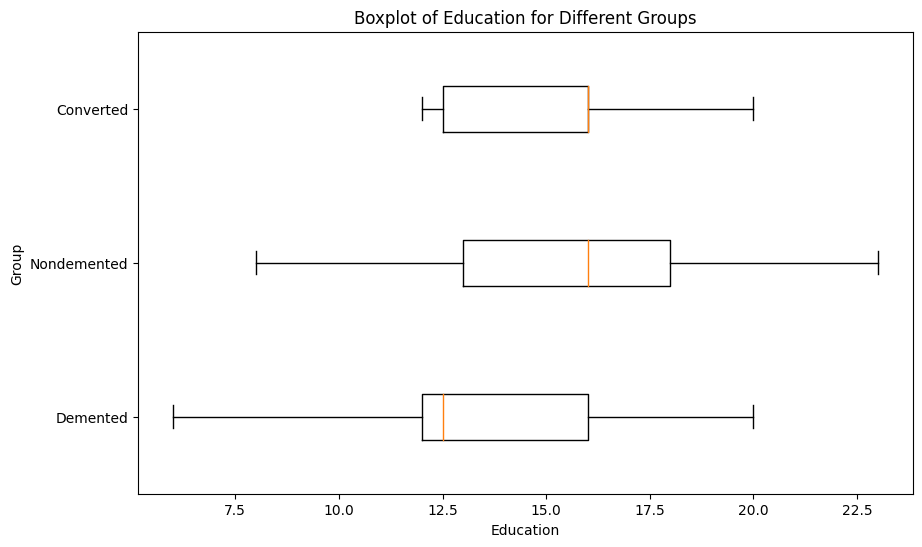

In [ ]:
# Filter the DataFrame for each group
demented_df = joined_df[joined_df['Group'] == 'Demented']
nondemented_df = joined_df[joined_df['Group'] == 'Nondemented']
converted_df = joined_df[joined_df['Group'] == 'Converted']

# Select the 'Education' column for each group
demented_education = demented_df['EDUC']
nondemented_education = nondemented_df['EDUC']
converted_education = converted_df['EDUC']

# Create the boxplot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([demented_education, nondemented_education, converted_education], vert=False, showfliers=True)

# Set the title and axis labels
plt.title('Boxplot of Education for Different Groups')
plt.xlabel('Education')
plt.ylabel('Group')
plt.yticks([1, 2, 3], ['Demented', 'Nondemented', 'Converted'])

plt.show()



Education observations/Comments

https://www.youtube.com/watch?v=7UK2DK7rblw
https://www.youtube.com/watch?v=eUkgf-2NVO8


Firstly, is this total years in education? assumed so. Check Kaggle.

Median (orange line) is higher for non-demented and converted than demented. Also, non demented receive more years of education than other groups. Converted and Demented have received the same maximum years of education.

SES Boxplots

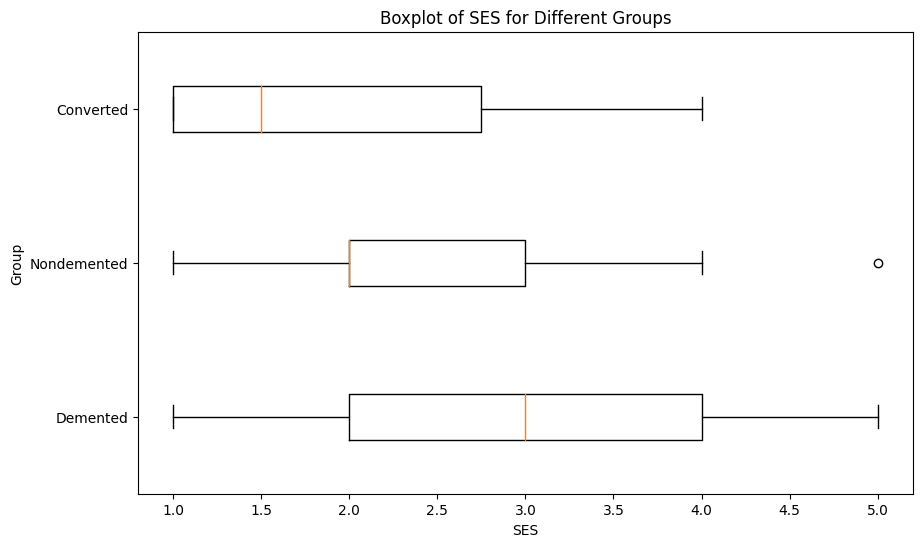

In [ ]:
# Filter the DataFrame for each group
demented_df = joined_df[joined_df['Group'] == 'Demented']
nondemented_df = joined_df[joined_df['Group'] == 'Nondemented']
converted_df = joined_df[joined_df['Group'] == 'Converted']

# Select the 'Education' column for each group
demented_education = demented_df['SES']
nondemented_education = nondemented_df['SES']
converted_education = converted_df['SES']

# Create the boxplot for each group
plt.figure(figsize=(10, 6))
plt.boxplot([demented_education, nondemented_education, converted_education], vert=False, showfliers=True)

# Set the title and axis labels
plt.title('Boxplot of SES for Different Groups')
plt.xlabel('SES')
plt.ylabel('Group')
plt.yticks([1, 2, 3], ['Demented', 'Nondemented', 'Converted'])

plt.show()

SES Observations/Comments

Outlier for Nondemented group. Consider eliminating if further analysis conducted.

Converted data is compromised because at some stage the data would've been nondemented. SES is lower in non-demented.

More of a spread for the demented: They come from rich AND poor but the converted come from lower SES.

# Hypotheses

1. More years in education significantly predicts less likelihood of developing dementia. (H1)
2. Socio-economic status does not significantly predict dementia. (H0)

Mean education for each group

In [ ]:
# Filter the DataFrame for each group
demented_df = joined_df[joined_df['Group'] == 'Demented']
nondemented_df = joined_df[joined_df['Group'] == 'Nondemented']
converted_df = joined_df[joined_df['Group'] == 'Converted']

# Select the mean for 'Education' column for each group
mean_demented_education = demented_df['EDUC'].mean()
mean_nondemented_education = nondemented_df['EDUC'].mean()
mean_converted_education = converted_df['EDUC'].mean()

# Create the array for the for loop
Groups = ['Demented', 'Nondemented', 'Converted']
mean_education = [mean_demented_education, mean_nondemented_education, mean_converted_education]

# Use zip to iterate through both lists simultaneously
for group, mean_edu in zip(Groups, mean_education):
    print(f'The mean education of {group} is {mean_edu:.2f}')


The mean education of Demented is 13.69
The mean education of Nondemented is 15.17
The mean education of Converted is 15.14


Is the difference between the means significant? A one-way ANOVA test will determine this

In [ ]:
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

# The DataFrame for each group
demented_df = joined_df[joined_df['Group'] == 'Demented']
nondemented_df = joined_df[joined_df['Group'] == 'Nondemented']
converted_df = joined_df[joined_df['Group'] == 'Converted']

# Extract the 'EDUC' column for each group
demented_edu = demented_df['EDUC']
nondemented_edu = nondemented_df['EDUC']
converted_edu = converted_df['EDUC']

# Perform one-way ANOVA test
statistic, p_value = stats.f_oneway(demented_edu, nondemented_edu, converted_edu)
print("One-way ANOVA Test:")
print(f"  F-statistic: {statistic:.2f}")
print(f"  p-value: {p_value:.4f}")

# Perform post-hoc tests (Tukey's HSD) for pairwise comparisons
posthoc_res = mc.MultiComparison(joined_df['EDUC'], joined_df['Group']).tukeyhsd()
print("\nPost-Hoc (Tukey's HSD) Test:")
print(posthoc_res)


One-way ANOVA Test:
  F-statistic: 5.10
  p-value: 0.0072

Post-Hoc (Tukey's HSD) Test:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
Converted    Demented  -1.4554 0.1859 -3.4105 0.4998  False
Converted Nondemented   0.0238 0.9995 -1.9118 1.9594  False
 Demented Nondemented   1.4792  0.007  0.3407 2.6176   True
-----------------------------------------------------------


# Education interpretation (ANOVA)

F-Statistic: The F-statistic is a value that quantifies the variation between the group means relative to the variation within the groups. A larger F-statistic indicates a greater difference between the group means compared to the variation within the groups.

p-value: The p-value is a measure of the evidence against the null hypothesis (H0). In this context, H0 assumes that the mean education scores of the three groups are equal (i.e., there are no significant differences among the groups). A low p-value suggests strong evidence against H0 and indicates that there are significant differences in mean education between at least two of the three groups.

Interpretation of the p-value (0.0072):
With a p-value of 0.0072, which is less than the commonly used significance level of 0.05, we reject the null hypothesis (H0) that the mean education scores of the three groups are equal. This suggests that there are significant differences in mean education scores between at least two of the three groups ('Demented', 'Nondemented', and 'Converted').

The post-hoc test compares all possible pairs of group means to identify which specific group means differ significantly from each other after finding a significant result in the one-way ANOVA test.

group1 and group2: The two groups being compared.
meandiff: The difference in mean education scores between the two groups.
p-adj: The adjusted p-value (also known as the corrected p-value) after accounting for multiple comparisons.
lower and upper: The lower and upper bounds of the confidence interval for the mean difference.
reject: Whether to reject the null hypothesis (H0) for the pairwise comparison. If "True," it means the two groups' mean difference is statistically significant; if "False," it means the difference is not statistically significant.

Mean SES for each group

In [ ]:
# Filter the DataFrame for each group
demented_df = joined_df[joined_df['Group'] == 'Demented']
nondemented_df = joined_df[joined_df['Group'] == 'Nondemented']
converted_df = joined_df[joined_df['Group'] == 'Converted']

# Select the mean for 'SES' column for each group
mean_demented_SES = demented_df['SES'].mean()
mean_nondemented_SES = nondemented_df['SES'].mean()
mean_converted_SES = converted_df['SES'].mean()

# Create the array for the for loop
Groups = ['Demented', 'Nondemented', 'Converted']
mean_SES = [mean_demented_SES, mean_nondemented_SES, mean_converted_SES]

# Use zip to iterate through both lists simultaneously
for group, mean_SES in zip(Groups, mean_SES):
    print(f'The mean SES of {group} is {mean_SES:.2f}')


The mean SES of Demented is 2.78
The mean SES of Nondemented is 2.42
The mean SES of Converted is 1.86


In [ ]:
from scipy import stats
import pandas as pd
import statsmodels.stats.multicomp as mc

# The DataFrame for each group
demented_df = joined_df[joined_df['Group'] == 'Demented']
nondemented_df = joined_df[joined_df['Group'] == 'Nondemented']
converted_df = joined_df[joined_df['Group'] == 'Converted']

# Extract the 'SES' column for each group
demented_ses = demented_df['SES']
nondemented_ses = nondemented_df['SES']
converted_ses = converted_df['SES']

# Perform one-way ANOVA test
statistic, p_value = stats.f_oneway(demented_ses, nondemented_ses, converted_ses)
print("One-way ANOVA Test:")
print(f"  F-statistic: {statistic:.2f}")
print(f"  p-value: {p_value:.4f}")

# Perform post-hoc tests (Tukey's HSD) for pairwise comparisons
ses_values = pd.concat([demented_ses, nondemented_ses, converted_ses], axis=0)
group_labels = ['Demented'] * len(demented_ses) + ['Nondemented'] * len(nondemented_ses) + ['Converted'] * len(converted_ses)

posthoc_res = mc.MultiComparison(ses_values, group_labels).tukeyhsd()
print("\nPost-Hoc (Tukey's HSD) Test:")
print(posthoc_res)


One-way ANOVA Test:
  F-statistic: 4.88
  p-value: 0.0089

Post-Hoc (Tukey's HSD) Test:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
Converted    Demented   0.9241 0.0115  0.1725 1.6757   True
Converted Nondemented   0.5595 0.1797 -0.1845 1.3036  False
 Demented Nondemented  -0.3646 0.1227 -0.8022  0.073  False
-----------------------------------------------------------


# SES individual group interpretation (ANOVA)

The One-way ANOVA test with an F-statistic of 4.88 and a p-value of 0.0089 indicates that there are statistically significant differences in the means of the 'SES' (Socioeconomic Status) variable across the three groups: 'Converted', 'Demented', and 'Nondemented'.

To further explore these differences, a post-hoc (Tukey's HSD) test was conducted to compare the means of 'SES' between each pair of groups. The post-hoc test results show:

The mean 'SES' of the 'Converted' group is significantly higher (0.9241) than that of the 'Demented' group (p-adj = 0.0115). We reject the null hypothesis, indicating a significant difference between these two groups.

There is no significant difference in the mean 'SES' between the 'Converted' and 'Nondemented' groups (p-adj = 0.1797).

There is no significant difference in the mean 'SES' between the 'Demented' and 'Nondemented' groups (p-adj = 0.1227).

It does not make sense to reject the null hypothesis with regards to Converted and Nondemented because they are essentially the same group.

There is one more possible routes of investigation: If the Converted and Nondemented were treated as one group, would there be a significant difference between the SES of this amalgamated group and that of the Demented?

Amalgamated Nondemented Group

In [ ]:
# Define Dfs
demented_df = joined_df[joined_df['Group'] == 'Demented']
nondemented_df = joined_df[joined_df['Group'] == 'Nondemented']
converted_df = joined_df[joined_df['Group'] == 'Converted']

# Combine the 'Nondemented' and 'Converted' DataFrames using pd.concat()
amalgamated_df = pd.concat([nondemented_df, converted_df])

# Select the mean for 'SES' column for each group
mean_demented_SES = demented_df['SES'].mean()
mean_nondemented_SES = amalgamated_df['SES'].mean()

# Create the array for the for loop
Groups = ['Demented', 'Nondemented']
mean_SES = [mean_demented_SES, mean_nondemented_SES]

# Use zip to iterate through both lists simultaneously
for group, mean_SES in zip(Groups, mean_SES):
    print(f'The mean SES of {group} is {mean_SES:.2f}')

The mean SES of Demented is 2.78
The mean SES of Nondemented is 2.33


In [ ]:
# Extract the 'SES' column for each group
nondemented_ses = amalgamated_df['SES']
demented_ses = demented_df['SES']

# Perform two-sample t-test
statistic, p_value = stats.ttest_ind(demented_ses, nondemented_ses)

print("Two-Sample T-Test:")
print(f"  t-statistic: {statistic:.2f}")
print(f"  p-value: {p_value:.4f}")

Two-Sample T-Test:
  t-statistic: 2.55
  p-value: 0.0119


# Amalgamted dataset interpretation (T-test)

With a p-value of 0.0119, which is less than the typical significance level of 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in 'SES' means among the groups.

However, the difference is not in the expected direction. The nondemented have a lower mean SES score than that of demented. This analysis predicts a higher SES score correlates with a higher risk of dementia.

# Final conclusions

After a testing experience manipulating the data into normal form, treating missing values and extensive exploratory data analysis, two hypotheses were formed. The first was that years in education statistically reduces the likelihood of developing dementia. The second was a null-hypothesis that socio-economic status has no effect on the likelihood of developing dementia. This analysis confirmed the first hypothesis and rejected the second. Continuing education for a longer period correlates with reduced risk of dementia while, surprisingly, higher socio-economic status correlated with a greater likelihood of developing dementia.   

# Options for further anlysis
(Remember - The converted are nondemented! They were initially assessed as demented but then later transformed).

Read what others have done on Kaggle.

More/better visualizations.

Could a regression model be made in power BI or other software? Inverse model with an education slider?? Use Power BI for key influencer feature. create csv/new excel file from this joined_df. what makes CRD rise to ≥1?

Original Italian study is very technical re ML and the English level makes it difficult to read. attempt ML with this data after finishing ML course.